In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime
dfa=pd.read_csv(r"C:\Users\School\Desktop\Datasets\Analytics Vidhya\airpassengers.csv")

In [3]:
dfa.head(1)

,Month,#Passengers
0,1949-01,112


In [4]:
dfa.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
dfa.shape

(144, 2)

In [6]:
dfa.dtypes

Month          object
#Passengers     int64
dtype: object

In [7]:
dfa.rename(columns={'#Passengers':'Passengers'}, inplace=True)

In [8]:
dfa.head(2)

,Month,Passengers
0,1949-01,112
1,1949-02,118


In [9]:
dfa.rename(str.lower, axis=1, inplace=True)

In [10]:
dfa.head()

,month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [22]:
ts=dfa['passengers']
td=dfa['month']

In [23]:
dfa.sort_values(['month'], ascending=True)
dfa.head(1)

,month,passengers
0,1949-01-01,112


In [24]:
dfa['month'] = pd.to_datetime(dfa['month'], errors='coerce')

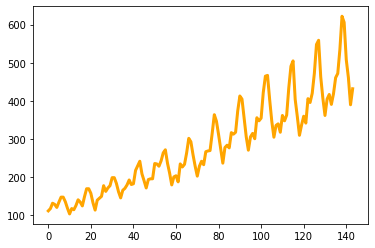

In [30]:
dfa.head(1)

plt.plot(dfa['passengers'], color='orange')

plt.plot(ts, color='orange', lw=3)

In [30]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries): 
    
   
    rolmean  = pd.Series(timeseries).rolling(window=12).mean()
    rolstd   = pd.Series(timeseries).rolling(window=12).std()
    
    
    orig=plt.plot(timeseries, color='blue', label='Original')
    
    mean=plt.plot(rolmean, color='red', label='Rolling Mean')
    
    std=plt.plot(rolstd, color='green', label='Rolling Std')
    
    plt.legend(loc='best')
    
    plt.title('Rolling Mean and Std Deviation', color='black')
    
    plt.show()
    
    print('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

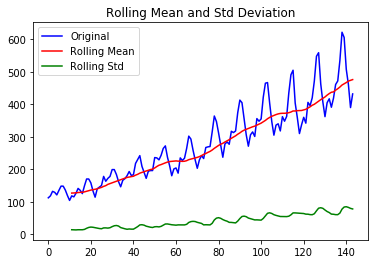

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [31]:
test_stationarity(ts)

In [32]:
ts_log = np.log(ts)

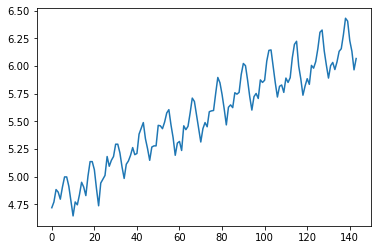

In [33]:
plt.plot(ts_log)

No handles with labels found to put in legend.


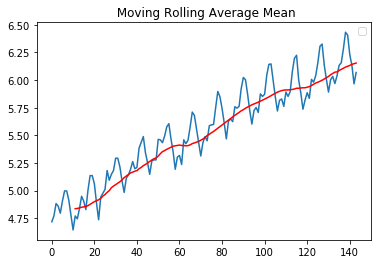

In [36]:
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.title(" Moving Rolling Average Mean") 
plt.legend(loc='best')

In [37]:
ts_log_moving_avg_diff = ts_log - moving_avg

In [40]:
ts_log_moving_avg_diff.head(15)

11   -0.065494
12   -0.093449
13   -0.007566
14    0.099416
15    0.052142
16   -0.027529
17    0.139881
18    0.260184
19    0.248635
20    0.162937
21   -0.018578
22   -0.180379
23    0.010818
24    0.026593
25    0.045965
Name: passengers, dtype: float64

In [41]:
ts_log_moving_avg_diff.dropna(inplace=True)

In [42]:
ts_log_moving_avg_diff.head(12)

11   -0.065494
12   -0.093449
13   -0.007566
14    0.099416
15    0.052142
16   -0.027529
17    0.139881
18    0.260184
19    0.248635
20    0.162937
21   -0.018578
22   -0.180379
Name: passengers, dtype: float64

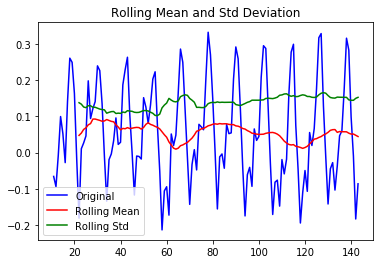

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [43]:
test_stationarity(ts_log_moving_avg_diff)

In [45]:
expweighted = ts_log.ewm(ts_log, span=12).mean()
plt.plot(ts_log)
plt.plot(expweighted, color='red')

ValueError: comass, span, halflife, and alpha are mutually exclusive

In [48]:
exponential_weighted_avg = ts_log.ewm(halflife=12, com=None, alpha=None).mean()

Text(0.5, 1.0, 'Exponential weighted Avg Mean & Transformation via Log')

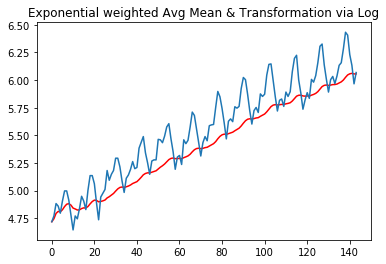

In [51]:
plt.plot(exponential_weighted_avg, color='red')
plt.plot(ts_log)
plt.title("Exponential weighted Avg Mean & Transformation via Log")

In [52]:
ts_log_ewma_diff = ts_log-exponential_weighted_avg

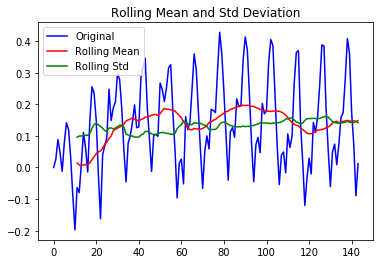

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [53]:
test_stationarity(ts_log_ewma_diff)

In [54]:
ts_log_diff = ts_log - ts_log.shift()

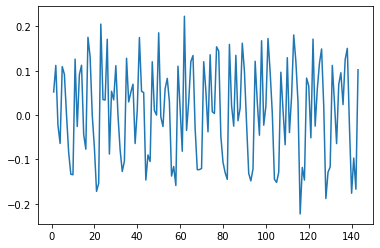

In [55]:
plt.plot(ts_log_diff)

In [56]:
ts_log_diff.dropna(inplace=True)

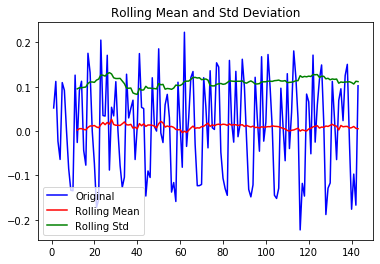

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [58]:
test_stationarity(ts_log_diff)

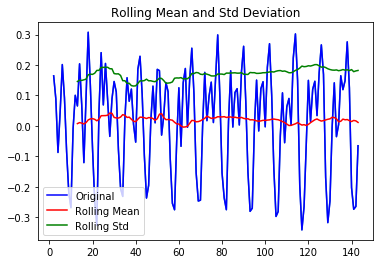

Results of Dickey-Fuller Test:
Test Statistic                  -3.167907
p-value                          0.021919
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [61]:
ts_log_diff_2 = ts_log - ts_log.shift(2)
plt.plot(ts_log_diff_2)
ts_log_diff_2.dropna(inplace=True)
test_stationarity(ts_log_diff_2)

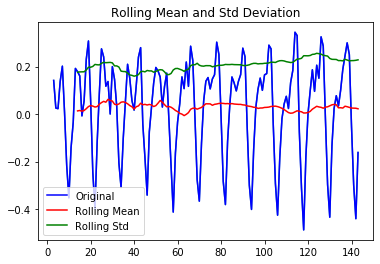

Results of Dickey-Fuller Test:
Test Statistic                  -2.728487
p-value                          0.069237
#Lags Used                      12.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [62]:
ts_log_diff_3 = ts_log - ts_log.shift(3)
plt.plot(ts_log_diff_3)
ts_log_diff_3.dropna(inplace=True)
test_stationarity(ts_log_diff_3)

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log,freq=12)

trend = decomposition.trend 

seasonal = decomposition.seasonal

residual = decomposition.resid

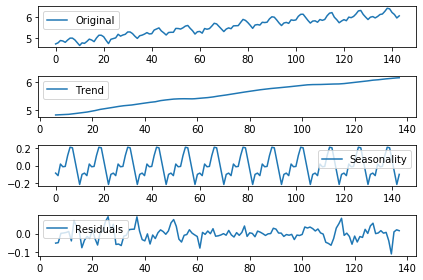

In [82]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [84]:
ts_log_decompose = residual 
ts_log_decompose.head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6   -0.050884
7   -0.048415
8    0.001223
9    0.003156
Name: passengers, dtype: float64

In [85]:
ts_log_decompose.dropna(inplace=True)

In [86]:
ts_log_decompose.head(5)

6    -0.050884
7    -0.048415
8     0.001223
9     0.003156
10    0.005749
Name: passengers, dtype: float64

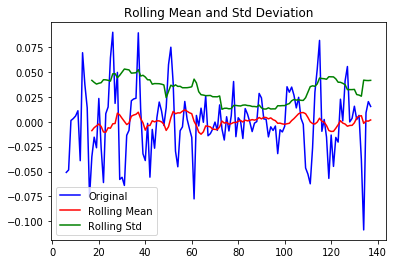

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [87]:
test_stationarity(ts_log_decompose)

In [88]:
# ACF and PACF Plots 

from statsmodels.tsa.stattools import acf, pacf

In [89]:
lag_acf = acf(ts_log_diff, nlags=20)

C:\Users\School\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [90]:
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

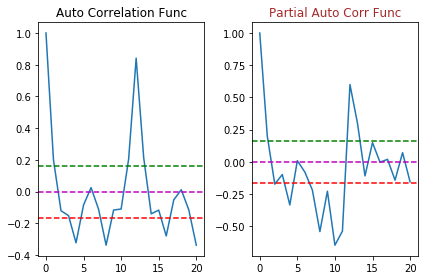

In [104]:
# Plot ACF 

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='m')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='r')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='g')
plt.title("Auto Correlation Func", fontsize=12)

plt.subplot(122)
plt.plot(lag_pacf)

plt.axhline(y=0, linestyle='--', color='m')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='r')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='g')
plt.title("Partial Auto Corr Func", fontsize=12, color='brown')

plt.tight_layout()

Text(0.5, 1.0, 'RSS:1.5023')

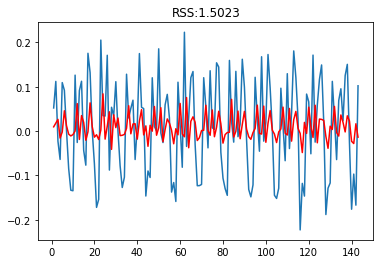

In [108]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order = (2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS:nan')

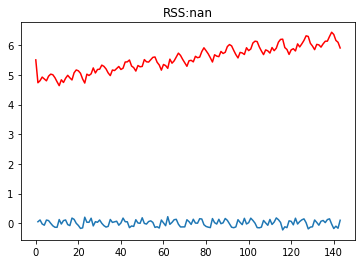

In [110]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order = (1,0,1))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS:1.4721')

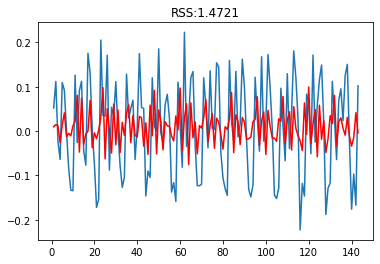

In [111]:

model =ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS: 1.0292')

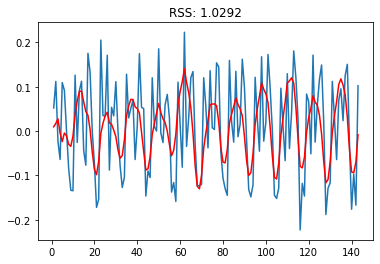

In [112]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [117]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy =True)
predictions_ARIMA_diff.head()

1    0.009580
2    0.017491
3    0.027670
4   -0.004521
5   -0.023890
dtype: float64

In [120]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

1    0.009580
2    0.027071
3    0.054742
4    0.050221
5    0.026331
dtype: float64

In [121]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\School\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0    4.718499
1    4.728079
2    4.745570
3    4.773241
4    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1044')

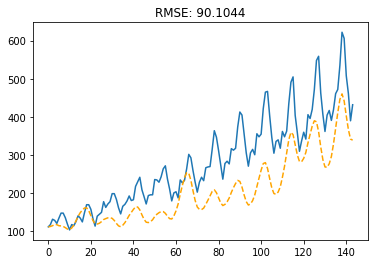

In [124]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA, color='orange',linestyle='--')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))